In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='paper')

In [9]:
import os
dpath = 'trait_gene_annotations'

In [2]:
df = pd.read_csv('10cc_ecpath_master.csv')

In [3]:
df. head()

,filename,locus_tag,type,start,end,strand,gene,product,db_xref,eC_number,...,antiSMASH,BioV_transp,blast_phytohormones,blast_vibrioferrin,blast_DMSP,dbCAN_CAZy,Species,recommended_name,systematic_name,synonyms
0,1402135.12,ALGBIFEJ_00001,CDS,7,408,+,NaN,hypothetical protein,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sulfitobacter pseudonitzschiae strain SMR1,NaN,NaN,NaN
1,1402135.12,ALGBIFEJ_00002,CDS,405,806,+,NaN,hypothetical protein,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sulfitobacter pseudonitzschiae strain SMR1,NaN,NaN,NaN
2,1402135.12,ALGBIFEJ_00003,CDS,803,1381,+,NaN,hypothetical protein,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sulfitobacter pseudonitzschiae strain SMR1,NaN,NaN,NaN
3,1402135.12,ALGBIFEJ_00004,CDS,1378,2424,+,NaN,hypothetical protein,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sulfitobacter pseudonitzschiae strain SMR1,NaN,NaN,NaN
4,1402135.12,ALGBIFEJ_00005,CDS,2501,4750,+,fadE,Acyl-coenzyme A dehydrogenase,COG:COG1960,1.3.8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,Sulfitobacter pseudonitzschiae strain SMR1,medium-chain acyl-CoA dehydrogenase,medium-chain acyl-CoA:electron-transfer flavop...,acyl dehydrogenase;medium-chain acyl CoA dehyd...


In [4]:
df.columns

Index(['filename', 'locus_tag', 'type', 'start', 'end', 'strand', 'gene',
       'product', 'db_xref', 'eC_number', 'KO', 'KEGG_KM', 'KEGG_manual',
       'antiSMASH', 'BioV_transp', 'blast_phytohormones', 'blast_vibrioferrin',
       'blast_DMSP', 'dbCAN_CAZy', 'Species', 'recommended_name',
       'systematic_name', 'synonyms'],
      dtype='object')

In [17]:
ec_df = df.pivot_table(
    columns='Species', 
    index=['eC_number', 'recommended_name', 'systematic_name', 'synonyms'],
    values='filename', aggfunc='count', fill_value=0,
)

In [18]:
ec_df.isna().sum(axis=1).value_counts()

0    1305
Name: count, dtype: int64

C:\Users\oweisberg\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\oweisberg\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


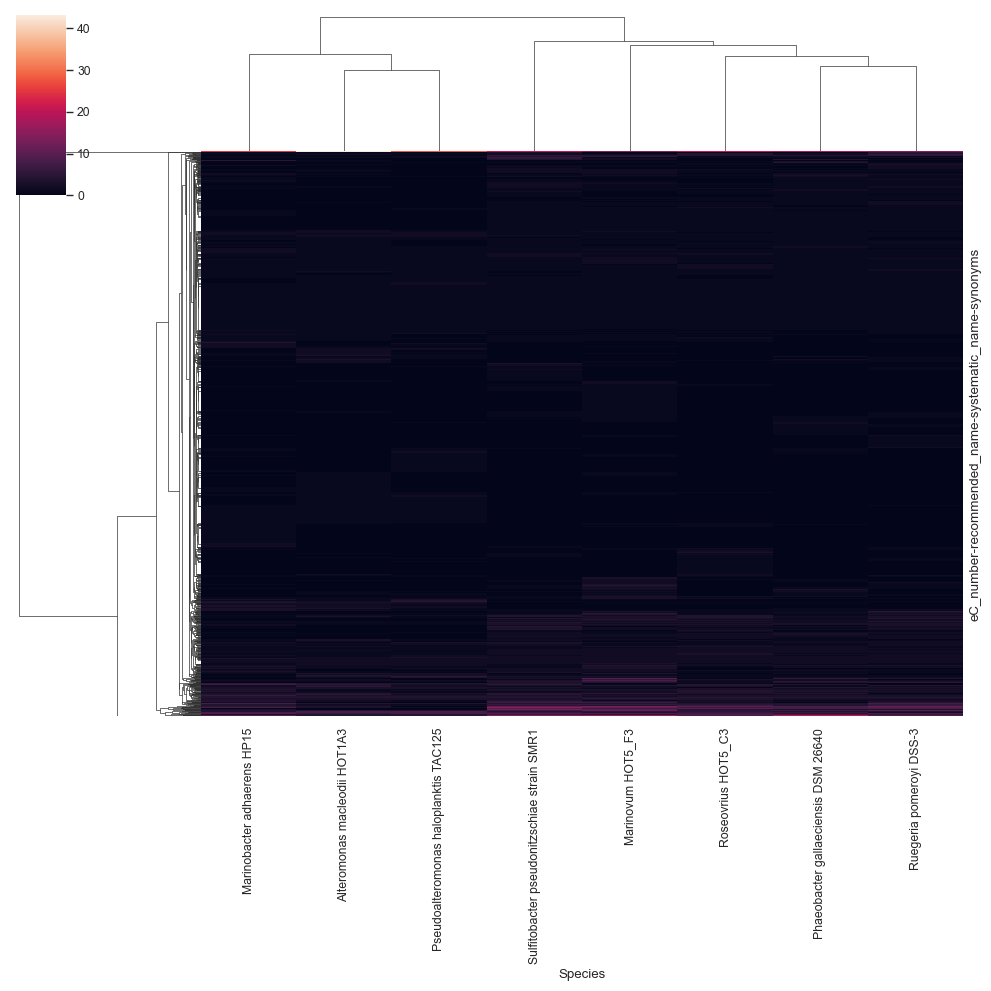

In [19]:
sns.clustermap(ec_df, yticklabels=[])

In [21]:
ec_df.to_csv('10cc_EC.csv')

In [22]:
selected_ecs = pd.read_excel(os.path.join(dpath,'brenda_results_extracellluar enzymes.xlsx'))

In [49]:
second_selected_ecs =  pd.read_excel(os.path.join(dpath,'N related  enzymes.xlsx'))

In [55]:
second_selected_ecs['pattern'] = second_selected_ecs['EC numbers'].replace(r'((x\.)?x)$','', regex=True)

In [58]:
patterns = second_selected_ecs['pattern'].dropna()

In [29]:
ec_df = ec_df.reset_index(drop=False)



In [30]:
ec_df.columns

Index(['eC_number', 'recommended_name', 'systematic_name', 'synonyms',
       'Alteromonas macleodii HOT1A3', 'Marinobacter adhaerens HP15',
       'Marinovum HOT5_F3', 'Phaeobacter gallaeciensis DSM 26640',
       'Pseudoalteromonas haloplanktis TAC125', 'Roseovrius HOT5_C3',
       'Ruegeria pomeroyi DSS-3',
       'Sulfitobacter pseudonitzschiae strain SMR1'],
      dtype='object', name='Species')

In [34]:
mask = np.column_stack([ec_df[col].str.contains(r"extra", na=False, case=False) for col in ['recommended_name', 'systematic_name', 'synonyms']])
ec_df.loc[mask.any(axis=1)]

Species,eC_number,recommended_name,systematic_name,synonyms,Alteromonas macleodii HOT1A3,Marinobacter adhaerens HP15,Marinovum HOT5_F3,Phaeobacter gallaeciensis DSM 26640,Pseudoalteromonas haloplanktis TAC125,Roseovrius HOT5_C3,Ruegeria pomeroyi DSS-3,Sulfitobacter pseudonitzschiae strain SMR1
126,1.13.11.2,"catechol 2,3-dioxygenase","catechol:oxygen 2,3-oxidoreductase (decyclizing)","tbuE;TdnC;pyrocatechol 2,3-dioxygenase;AtdB;C2...",0,2,0,0,0,1,1,1
127,1.13.11.24,"quercetin 2,3-dioxygenase","quercetin:oxygen 2,3-oxidoreductase (decyclizing)",type III extradiol dioxygenase;quercetinase;qu...,1,0,0,0,1,0,0,0
193,1.15.1.1,superoxide dismutase,superoxide:superoxide oxidoreductase,Mn-SOD;iron-dependent superoxide dismutase;CR1...,3,1,1,1,1,2,1,2
741,3.1.1.3,triacylglycerol lipase,triacylglycerol acylhydrolase,LipB68;lipase MY;LPL;Pancreatic lysophospholip...,1,5,0,0,0,0,0,0
759,3.1.3.1,alkaline phosphatase,phosphate-monoester phosphohydrolase (alkaline...,TNSALP;non-specific alkaline phosphatase;phosp...,2,0,0,0,1,0,1,0
765,3.1.3.12,trehalose-phosphatase,"alpha,alpha-trehalose-6-phosphate phosphohydro...",T6PP;TPPA;Acey-TPP;trehalose_PPase;TPPD;chTPP;...,0,0,0,0,0,1,0,1
1003,4.2.1.1,carbonic anhydrase,carbonic acid hydro-lyase (carbon-dioxide-form...,Rv1248;hCA VI;CaNce103;B13-CA;hCAII;pentraxin-...,1,1,1,1,1,1,1,1


In [36]:
pd.merge(ec_df.loc[ec_df.eC_number.isin(selected_ecs.EC_number)], selected_ecs[['EC_number','category']], 
         left_on='eC_number', right_on='EC_number', how='left')

,eC_number,recommended_name,systematic_name,synonyms,Alteromonas macleodii HOT1A3,Marinobacter adhaerens HP15,Marinovum HOT5_F3,Phaeobacter gallaeciensis DSM 26640,Pseudoalteromonas haloplanktis TAC125,Roseovrius HOT5_C3,Ruegeria pomeroyi DSS-3,Sulfitobacter pseudonitzschiae strain SMR1,EC_number,category
0,1.15.1.1,superoxide dismutase,superoxide:superoxide oxidoreductase,Mn-SOD;iron-dependent superoxide dismutase;CR1...,3,1,1,1,1,2,1,2,1.15.1.1,ROS
1,3.1.1.3,triacylglycerol lipase,triacylglycerol acylhydrolase,LipB68;lipase MY;LPL;Pancreatic lysophospholip...,1,5,0,0,0,0,0,0,3.1.1.3,NaN
2,3.1.3.1,alkaline phosphatase,phosphate-monoester phosphohydrolase (alkaline...,TNSALP;non-specific alkaline phosphatase;phosp...,2,0,0,0,1,0,1,0,3.1.3.1,NaN
3,4.2.1.1,carbonic anhydrase,carbonic acid hydro-lyase (carbon-dioxide-form...,Rv1248;hCA VI;CaNce103;B13-CA;hCAII;pentraxin-...,1,1,1,1,1,1,1,1,4.2.1.1,NaN


In [62]:
ec_df.loc[ec_df.eC_number.str.startswith(tuple(patterns.values))]


Species,eC_number,recommended_name,systematic_name,synonyms,Alteromonas macleodii HOT1A3,Marinobacter adhaerens HP15,Marinovum HOT5_F3,Phaeobacter gallaeciensis DSM 26640,Pseudoalteromonas haloplanktis TAC125,Roseovrius HOT5_C3,Ruegeria pomeroyi DSS-3,Sulfitobacter pseudonitzschiae strain SMR1
78,1.1.1.410,D-erythronate 2-dehydrogenase,D-erythronate:NAD+ 2-oxidoreductase,denD,0,0,0,0,0,0,1,2
79,1.1.1.411,L-threonate 2-dehydrogenase,L-threonate:NAD+ 2-oxidoreductase,ltnD;L-threonic acid dehydrogenase;L-threonate...,0,0,1,0,0,0,1,1
80,1.1.1.413,A-factor type gamma-butyrolactone 1'-reductase...,"(3R,4R)-3-[(1S)-1-hydroxyalkyl]-4-(hydroxymeth...",Virginiae butanolide-specific dehydrogenase;BARS1,0,0,0,1,0,0,0,0
81,1.1.1.414,L-galactonate 5-dehydrogenase,L-galactonate:NAD+ 5-oxidoreductase,YjjN;Bvu0222;L-galactonate dehydrogenase,0,0,1,0,0,1,0,0
82,1.1.1.42,isocitrate dehydrogenase (NADP+),isocitrate:NADP+ oxidoreductase (decarboxylating),NADP+-isocitrate dehydrogenase;IDH-IIa;IDP1;cy...,3,1,3,1,5,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1261,6.3.5.3,phosphoribosylformylglycinamidine synthase,N2-formyl-N1-(5-phospho-D-ribosyl)glycinamide:...,ORF75c;FGARAT;5'-phosphoribosylformyl glycinam...,1,1,3,3,1,3,3,3
1262,6.3.5.4,asparagine synthase (glutamine-hydrolysing),L-aspartate:L-glutamine amido-ligase (AMP-form...,type -II asparagine synthetase;PnAS3;MLOC_4408...,2,2,0,0,1,0,0,0
1263,6.3.5.5,carbamoyl-phosphate synthase (glutamine-hydrol...,hydrogen-carbonate:L-glutamine amido-ligase (A...,CPSase type II;carbamoyl phosphate synthetase ...,2,4,5,4,2,2,4,4
1264,6.3.5.7,glutaminyl-tRNA synthase (glutamine-hydrolysing),L-glutamyl-tRNAGln:L-glutamine amido-ligase (A...,PBANKA_071810;PF3D7_0416100;Qrsl1;Gln4;Glu-tRN...,1,2,1,1,0,1,1,3
